In [1]:
# prompt: mount in drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### AAL Atlases

In [2]:
import pandas as pd
import glob

# Define the path to the directory containing the text files
file_path = '/content/drive/MyDrive/fmri/AAL_runs/'

# Use glob to find all text files matching the pattern
all_files = glob.glob(file_path + 'AAL_runs_subj*.txt')

# Create an empty list to store the dataframes
li = []

# Iterate over all the files and read them into dataframes
for filename in all_files:
  try:
      # Read the file assuming a single column and using default separator (usually comma)
      df = pd.read_csv(filename)
      # If you need to specify a different delimiter, like tab, use sep='\t'
      # df = pd.read_csv(filename, sep='\t')
      li.append(df)
  except pd.errors.EmptyDataError:
      print(f"Warning: Skipping empty file {filename}")
  except FileNotFoundError:
      print(f"Error: File {filename} not found.")


# Concatenate all dataframes into one
if li:
  frame = pd.concat(li, axis=0, ignore_index=True)
  print(frame.head()) # Display the first few rows
else:
  print("No valid data files found.")

   Region and accuracy tuple: (1   0.10975609756097561)  0.14227642276422764)  \
0  Region and accuracy tuple: (2   0.11382113821138211)                   NaN   
1  Region and accuracy tuple: (3   0.08536585365853659)                   NaN   
2  Region and accuracy tuple: (4   0.08943089430894309)                   NaN   
3  Region and accuracy tuple: (5   0.08536585365853659)                   NaN   
4  Region and accuracy tuple: (6   0.12195121951219512)                   NaN   

   0.11788617886178862)  0.0975609756097561)  0.13008130081300814)  
0                   NaN                  NaN                   NaN  
1                   NaN                  NaN                   NaN  
2                   NaN                  NaN                   NaN  
3                   NaN                  NaN                   NaN  
4                   NaN                  NaN                   NaN  


In [3]:
# prompt: read in all_files[0] and parse the tuples in the txt files, with

import pandas as pd
import re

def parse_tuples(filepath):
  """Parses a text file containing tuples and returns a list of dictionaries."""
  try:
    with open(filepath, 'r') as file:
      lines = file.readlines()
  except FileNotFoundError:
    print(f"Error: File not found at {filepath}")
    return []

  data = []
  for line in lines:
    # Use regex to find tuples in the line. Adjust the regex if your tuples have a different format.
    matches = re.findall(r'\((.*?)\)', line)
    for match in matches:
      try:
          # Split each tuple by commas
          parts = [part.strip() for part in match.split(',')]
          # Assuming the first part is the key and the second part is the value
          # Adapt as per the actual structure of your tuples
          if len(parts) == 2:
              data.append({'key': parts[0], 'value': parts[1]})
          else:
              print(f"Warning: Skipping malformed tuple: {match} in file: {filepath}")
      except (ValueError, IndexError) as e:
          print(f"Error while parsing tuple: {match} from {filepath}: {e}")

  return data


# Example usage (assuming all_files[0] exists)
if all_files:
  parsed_data = parse_tuples(all_files[2])
  print(parsed_data)

  # Convert to DataFrame if needed
  df_parsed = pd.DataFrame(parsed_data)
  print(df_parsed.head())
else:
    print("all_files list is empty.")


[{'key': '1', 'value': '0.11788617886178862'}, {'key': '2', 'value': '0.11382113821138211'}, {'key': '3', 'value': '0.08536585365853659'}, {'key': '4', 'value': '0.0975609756097561'}, {'key': '5', 'value': '0.10569105691056911'}, {'key': '6', 'value': '0.11382113821138211'}, {'key': '7', 'value': '0.1016260162601626'}, {'key': '8', 'value': '0.09349593495934959'}, {'key': '9', 'value': '0.12195121951219512'}, {'key': '10', 'value': '0.0975609756097561'}, {'key': '11', 'value': '0.10569105691056911'}, {'key': '12', 'value': '0.1016260162601626'}, {'key': '13', 'value': '0.12195121951219512'}, {'key': '14', 'value': '0.11382113821138211'}, {'key': '15', 'value': '0.08943089430894309'}, {'key': '16', 'value': '0.08536585365853659'}, {'key': '17', 'value': '0.12601626016260162'}, {'key': '18', 'value': '0.13414634146341464'}, {'key': '19', 'value': '0.13821138211382114'}, {'key': '20', 'value': '0.07723577235772358'}, {'key': '21', 'value': '0.13008130081300814'}, {'key': '22', 'value': '0

In [4]:
# prompt: traverse the rows of key and value

for index, row in df_parsed.iterrows():
    key = row['key']
    value = row['value']
    print(f"Key: {key}, Value: {value}")


Key: 1, Value: 0.11788617886178862
Key: 2, Value: 0.11382113821138211
Key: 3, Value: 0.08536585365853659
Key: 4, Value: 0.0975609756097561
Key: 5, Value: 0.10569105691056911
Key: 6, Value: 0.11382113821138211
Key: 7, Value: 0.1016260162601626
Key: 8, Value: 0.09349593495934959
Key: 9, Value: 0.12195121951219512
Key: 10, Value: 0.0975609756097561
Key: 11, Value: 0.10569105691056911
Key: 12, Value: 0.1016260162601626
Key: 13, Value: 0.12195121951219512
Key: 14, Value: 0.11382113821138211
Key: 15, Value: 0.08943089430894309
Key: 16, Value: 0.08536585365853659
Key: 17, Value: 0.12601626016260162
Key: 18, Value: 0.13414634146341464
Key: 19, Value: 0.13821138211382114
Key: 20, Value: 0.07723577235772358
Key: 21, Value: 0.13008130081300814
Key: 22, Value: 0.13414634146341464
Key: 23, Value: 0.10975609756097561
Key: 24, Value: 0.13414634146341464
Key: 25, Value: 0.08536585365853659
Key: 26, Value: 0.11788617886178862
Key: 27, Value: 0.10569105691056911
Key: 28, Value: 0.12195121951219512
Key: 

In [7]:
all_collected_data = {}
for i in range(1, 117):
  all_collected_data[str(i)] = []
for file_idx in range(5):
  parsed_data = parse_tuples(all_files[file_idx])
  print(parsed_data)
  my_dict_null = {}
  for i in range(1, 117):
      my_dict_null[str(i)] = None
  # Convert to DataFrame if needed
  df_parsed = pd.DataFrame(parsed_data)
  for index, row in df_parsed.iterrows():
    key = row['key']
    value = row['value']
    if my_dict_null[key] == None:
      all_collected_data[key].append(value)
      my_dict_null[key] = value

else:
    print("all_files list is empty.")

[{'key': '1', 'value': '0.10975609756097561'}, {'key': '2', 'value': '0.11382113821138211'}, {'key': '3', 'value': '0.08536585365853659'}, {'key': '4', 'value': '0.08943089430894309'}, {'key': '5', 'value': '0.08536585365853659'}, {'key': '6', 'value': '0.12195121951219512'}, {'key': '7', 'value': '0.11382113821138211'}, {'key': '8', 'value': '0.10975609756097561'}, {'key': '9', 'value': '0.0975609756097561'}, {'key': '10', 'value': '0.10569105691056911'}, {'key': '11', 'value': '0.11382113821138211'}, {'key': '12', 'value': '0.10569105691056911'}, {'key': '13', 'value': '0.14634146341463414'}, {'key': '14', 'value': '0.11382113821138211'}, {'key': '14', 'value': '0.11382113821138211'}, {'key': '15', 'value': '0.08943089430894309'}, {'key': '16', 'value': '0.0975609756097561'}, {'key': '17', 'value': '0.17073170731707318'}, {'key': '18', 'value': '0.15853658536585366'}, {'key': '19', 'value': '0.12195121951219512'}, {'key': '20', 'value': '0.07317073170731707'}, {'key': '21', 'value': 

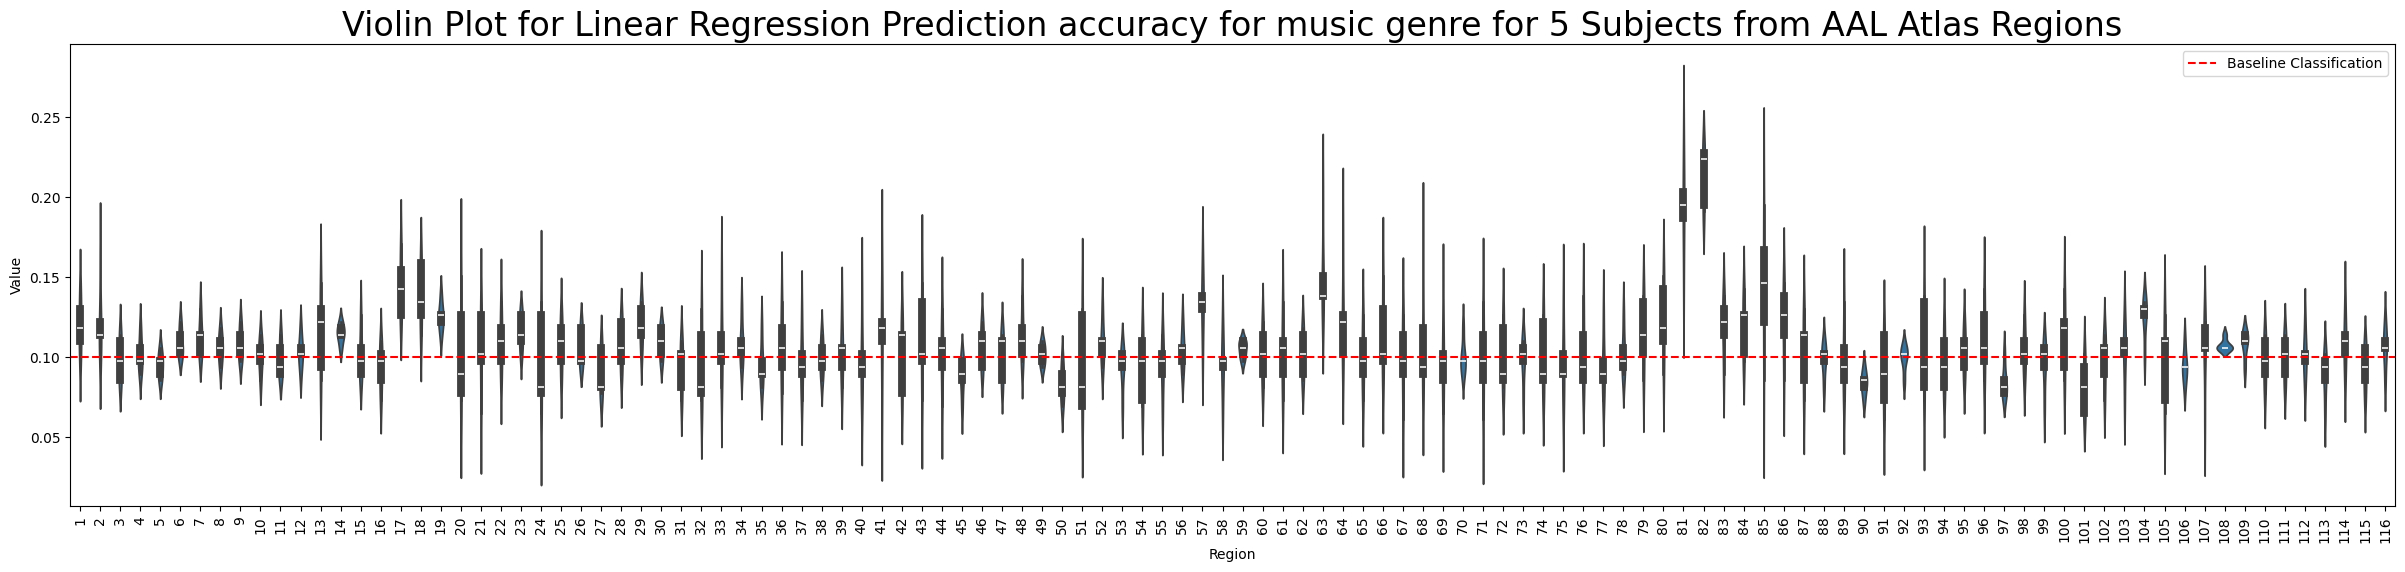

In [9]:
# prompt: Can you add a horizontal baseline at 0.1

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming 'all_collected_data' is already defined and populated as in your previous code

# Prepare data for plotting
plot_data = []
for key in all_collected_data:
    for i in range(5):
      plot_data.append({'Region': int(key), 'Value': float(all_collected_data[key][i])})

df_plot = pd.DataFrame(plot_data)


# Create the violin plot
plt.figure(figsize=(30, 6))  # Adjust figure size as needed
sns.violinplot(x='Region', y='Value', data=df_plot)
plt.axhline(y=0.1, color='r', linestyle='--', label='Baseline Classification') # Add horizontal line
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Region')
plt.ylabel('Value')
plt.title('Violin Plot for Linear Regression Prediction accuracy for music genre for 5 Subjects from AAL Atlas Regions', fontsize=24)
plt.legend() # Show the legend
plt.show()


### Destrieux Atlas

In [10]:
import pandas as pd
import glob

# Define the path to the directory containing the text files
file_path = '/content/drive/MyDrive/fmri/Destrieux_runs/'

# Use glob to find all text files matching the pattern
all_files = glob.glob(file_path + 'Destrieux_runs_subj*.txt')

# Create an empty list to store the dataframes
li = []

# Iterate over all the files and read them into dataframes
for filename in all_files:
  try:
      # Read the file assuming a single column and using default separator (usually comma)
      df = pd.read_csv(filename)
      # If you need to specify a different delimiter, like tab, use sep='\t'
      # df = pd.read_csv(filename, sep='\t')
      li.append(df)
  except pd.errors.EmptyDataError:
      print(f"Warning: Skipping empty file {filename}")
  except FileNotFoundError:
      print(f"Error: File {filename} not found.")


# Concatenate all dataframes into one
if li:
  frame = pd.concat(li, axis=0, ignore_index=True)
  print(frame.head()) # Display the first few rows
else:
  print("No valid data files found.")

   Region and accuracy tuple: (1    0.1016260162601626)  0.0975609756097561)  \
0  Region and accuracy tuple: (2   0.10569105691056911)                  NaN   
1  Region and accuracy tuple: (3    0.0975609756097561)                  NaN   
2  Region and accuracy tuple: (4   0.16666666666666666)                  NaN   
3  Region and accuracy tuple: (5   0.10975609756097561)                  NaN   
4  Region and accuracy tuple: (6   0.08943089430894309)                  NaN   

   0.11382113821138211)  0.07723577235772358)  
0                   NaN                   NaN  
1                   NaN                   NaN  
2                   NaN                   NaN  
3                   NaN                   NaN  
4                   NaN                   NaN  


In [ ]:
all_files

['/content/drive/MyDrive/fmri/Destrieux_runs/Destrieux_runs_subj1.txt',
 '/content/drive/MyDrive/fmri/Destrieux_runs/Destrieux_runs_subj2.txt',
 '/content/drive/MyDrive/fmri/Destrieux_runs/Destrieux_runs_subj3.txt',
 '/content/drive/MyDrive/fmri/Destrieux_runs/Destrieux_runs_subj4.txt',
 '/content/drive/MyDrive/fmri/Destrieux_runs/Destrieux_runs_subj5.txt']

In [11]:
# prompt: read in all_files[0] and parse the tuples in the txt files, with

import pandas as pd
import re

def parse_tuples(filepath):
  """Parses a text file containing tuples and returns a list of dictionaries."""
  try:
    with open(filepath, 'r') as file:
      lines = file.readlines()
  except FileNotFoundError:
    print(f"Error: File not found at {filepath}")
    return []

  data = []
  for line in lines:
    # Use regex to find tuples in the line. Adjust the regex if your tuples have a different format.
    matches = re.findall(r'\((.*?)\)', line)
    for match in matches:
      try:
          # Split each tuple by commas
          parts = [part.strip() for part in match.split(',')]
          # Assuming the first part is the key and the second part is the value
          # Adapt as per the actual structure of your tuples
          if len(parts) == 2:
              data.append({'key': parts[0], 'value': parts[1]})
          else:
              print(f"Warning: Skipping malformed tuple: {match} in file: {filepath}")
      except (ValueError, IndexError) as e:
          print(f"Error while parsing tuple: {match} from {filepath}: {e}")

  return data


# Example usage (assuming all_files[0] exists)
if all_files:
  parsed_data = parse_tuples(all_files[2])
  print(parsed_data)

  # Convert to DataFrame if needed
  df_parsed = pd.DataFrame(parsed_data)
  print(df_parsed.head())
else:
    print("all_files list is empty.")


[{'key': '1', 'value': '0.11382113821138211'}, {'key': '2', 'value': '0.11382113821138211'}, {'key': '3', 'value': '0.13821138211382114'}, {'key': '4', 'value': '0.17479674796747968'}, {'key': '5', 'value': '0.12195121951219512'}, {'key': '6', 'value': '0.10975609756097561'}, {'key': '7', 'value': '0.10569105691056911'}, {'key': '8', 'value': '0.1016260162601626'}, {'key': '9', 'value': '0.10975609756097561'}, {'key': '10', 'value': '0.0975609756097561'}, {'key': '11', 'value': '0.10569105691056911'}, {'key': '12', 'value': '0.12601626016260162'}, {'key': '13', 'value': '0.09349593495934959'}, {'key': '14', 'value': '0.08943089430894309'}, {'key': '15', 'value': '0.11788617886178862'}, {'key': '16', 'value': '0.09349593495934959'}, {'key': '17', 'value': '0.12195121951219512'}, {'key': '18', 'value': '0.11382113821138211'}, {'key': '19', 'value': '0.10975609756097561'}, {'key': '20', 'value': '0.08943089430894309'}, {'key': '21', 'value': '0.10569105691056911'}, {'key': '22', 'value': 

In [12]:
# prompt: traverse the rows of key and value

for index, row in df_parsed.iterrows():
    key = row['key']
    value = row['value']
    print(f"Key: {key}, Value: {value}")


Key: 1, Value: 0.11382113821138211
Key: 2, Value: 0.11382113821138211
Key: 3, Value: 0.13821138211382114
Key: 4, Value: 0.17479674796747968
Key: 5, Value: 0.12195121951219512
Key: 6, Value: 0.10975609756097561
Key: 7, Value: 0.10569105691056911
Key: 8, Value: 0.1016260162601626
Key: 9, Value: 0.10975609756097561
Key: 10, Value: 0.0975609756097561
Key: 11, Value: 0.10569105691056911
Key: 12, Value: 0.12601626016260162
Key: 13, Value: 0.09349593495934959
Key: 14, Value: 0.08943089430894309
Key: 15, Value: 0.11788617886178862
Key: 16, Value: 0.09349593495934959
Key: 17, Value: 0.12195121951219512
Key: 18, Value: 0.11382113821138211
Key: 19, Value: 0.10975609756097561
Key: 20, Value: 0.08943089430894309
Key: 21, Value: 0.10569105691056911
Key: 22, Value: 0.10975609756097561
Key: 23, Value: 0.15040650406504066
Key: 24, Value: 0.10569105691056911
Key: 25, Value: 0.10975609756097561
Key: 26, Value: 0.13414634146341464
Key: 27, Value: 0.07723577235772358
Key: 28, Value: 0.11788617886178862
Key

In [13]:
all_collected_data = {}
for i in range(1, 76):
  if i!=42:
    all_collected_data[str(i)] = []
for file_idx in range(5):
  parsed_data = parse_tuples(all_files[file_idx])
  print(parsed_data)
  my_dict_null = {}
  for i in range(1, 76):
    if i!=42:
      my_dict_null[str(i)] = None
  # Convert to DataFrame if needed
  df_parsed = pd.DataFrame(parsed_data)
  for index, row in df_parsed.iterrows():
    key = row['key']
    value = row['value']
    if my_dict_null[key] == None:
      all_collected_data[key].append(value)
      my_dict_null[key] = value

else:
    print("all_files list is empty.")

[{'key': '1', 'value': '0.1016260162601626'}, {'key': '2', 'value': '0.10569105691056911'}, {'key': '3', 'value': '0.0975609756097561'}, {'key': '4', 'value': '0.16666666666666666'}, {'key': '5', 'value': '0.10975609756097561'}, {'key': '6', 'value': '0.08943089430894309'}, {'key': '7', 'value': '0.12195121951219512'}, {'key': '8', 'value': '0.09349593495934959'}, {'key': '9', 'value': '0.08130081300813008'}, {'key': '10', 'value': '0.1016260162601626'}, {'key': '11', 'value': '0.10975609756097561'}, {'key': '12', 'value': '0.13008130081300814'}, {'key': '13', 'value': '0.08943089430894309'}, {'key': '14', 'value': '0.07317073170731707'}, {'key': '15', 'value': '0.08130081300813008'}, {'key': '16', 'value': '0.11788617886178862'}, {'key': '17', 'value': '0.12195121951219512'}, {'key': '18', 'value': '0.1016260162601626'}, {'key': '19', 'value': '0.10975609756097561'}, {'key': '20', 'value': '0.13414634146341464'}, {'key': '21', 'value': '0.12195121951219512'}, {'key': '22', 'value': '0

In [ ]:
# prompt: check if all vallue in all_collected_data is a list of five numbers

def check_data(all_collected_data):
  """Checks if all values in all_collected_data are lists of five numbers."""
  for key, value in all_collected_data.items():
    if not isinstance(value, list) or len(value) != 5:
      print(f"Error: Value for key '{key}' is not a list of five elements: {value}")
      return False

  return True

# Example usage
if check_data(all_collected_data):
    print("All values are lists of five numbers.")
else:
    print("Some values are not lists of five numbers.")


All values are lists of five numbers.


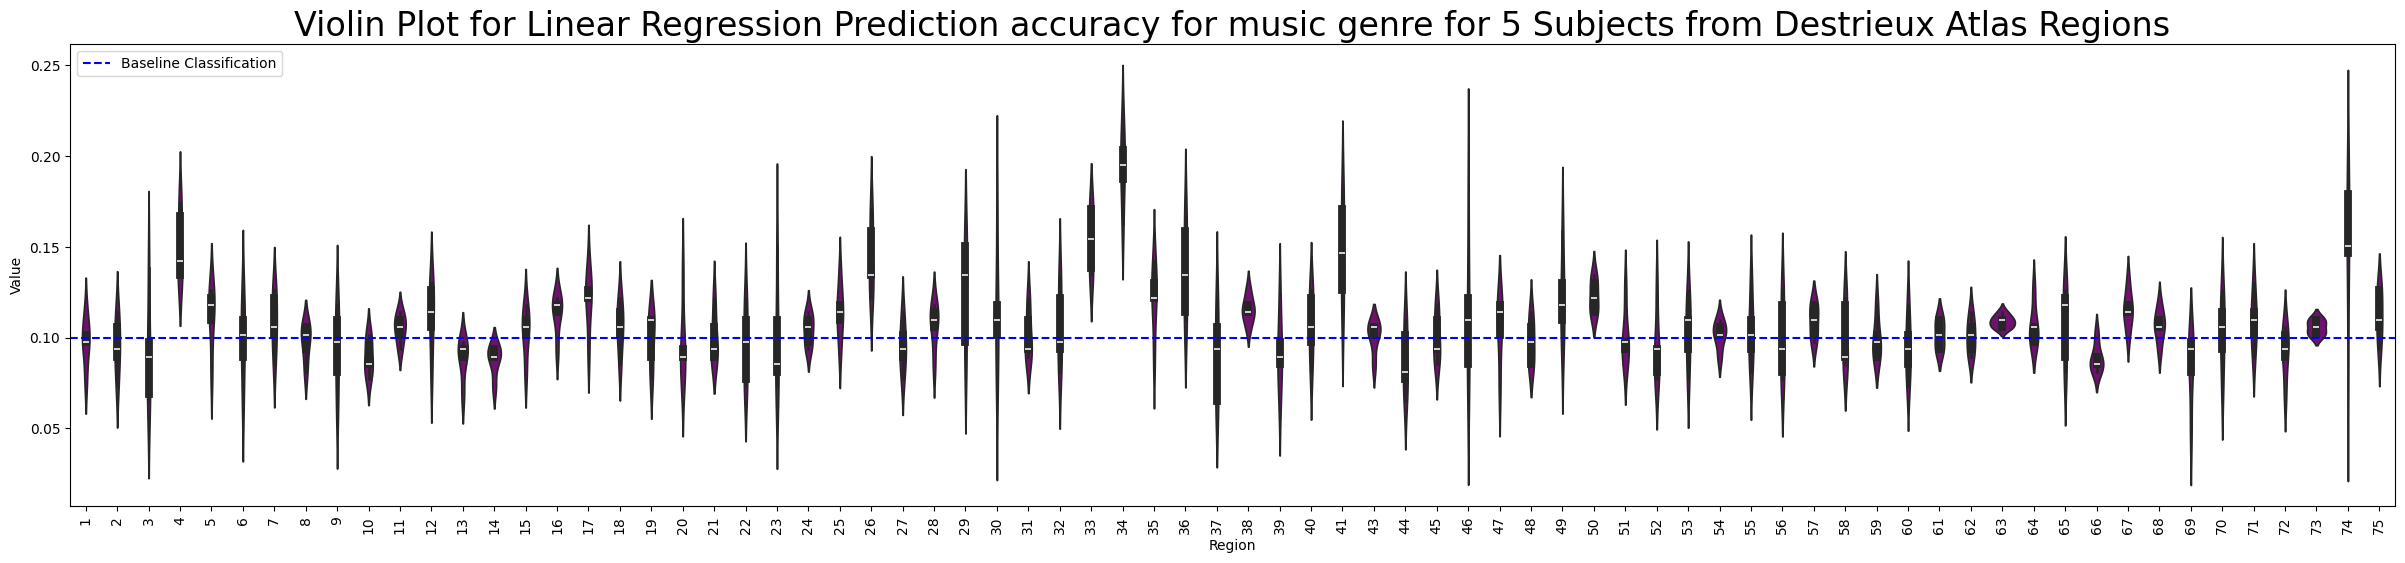

In [14]:
# prompt: Can you add a horizontal baseline at 0.1

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming 'all_collected_data' is already defined and populated as in your previous code

# Prepare data for plotting
plot_data = []
for key in all_collected_data:
    for i in range(5):
      plot_data.append({'Region': int(key), 'Value': float(all_collected_data[key][i])})

df_plot = pd.DataFrame(plot_data)


# Create the violin plot
plt.figure(figsize=(30, 6))  # Adjust figure size as needed
sns.violinplot(x='Region', y='Value', data=df_plot,color="purple")
plt.axhline(y=0.1, color='b', linestyle='--', label='Baseline Classification') # Add horizontal line
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Region')
plt.ylabel('Value')
plt.title('Violin Plot for Linear Regression Prediction accuracy for music genre for 5 Subjects from Destrieux Atlas Regions',fontsize=24)
plt.legend() # Show the legend
plt.show()


### Desikan Atlas

In [15]:
import pandas as pd
import glob

# Define the path to the directory containing the text files
file_path = '/content/drive/MyDrive/fmri/Linear_reg_runs/'

# Use glob to find all text files matching the pattern
all_files = glob.glob(file_path + 'Desikan_res_subj*.txt')

# Create an empty list to store the dataframes
li = []

# Iterate over all the files and read them into dataframes
for filename in all_files:
  try:
      # Read the file assuming a single column and using default separator (usually comma)
      df = pd.read_csv(filename)
      # If you need to specify a different delimiter, like tab, use sep='\t'
      # df = pd.read_csv(filename, sep='\t')
      li.append(df)
  except pd.errors.EmptyDataError:
      print(f"Warning: Skipping empty file {filename}")
  except FileNotFoundError:
      print(f"Error: File {filename} not found.")


# Concatenate all dataframes into one
if li:
  frame = pd.concat(li, axis=0, ignore_index=True)
  print(frame.head()) # Display the first few rows
else:
  print("No valid data files found.")

   Region and accuracy tuple: (70   0.15447154471544716)  \
0  Region and accuracy tuple: (69    0.1016260162601626)   
1  Region and accuracy tuple: (52    0.0975609756097561)   
2  Region and accuracy tuple: (51   0.08943089430894309)   
3  Region and accuracy tuple: (45   0.11382113821138211)   
4  Region and accuracy tuple: (43   0.08536585365853659)   

   0.10975609756097561)  0.17073170731707318)  0.14227642276422764)  
0                   NaN                   NaN                   NaN  
1                   NaN                   NaN                   NaN  
2                   NaN                   NaN                   NaN  
3                   NaN                   NaN                   NaN  
4                   NaN                   NaN                   NaN  


In [ ]:
all_files

['/content/drive/MyDrive/fmri/Linear_reg_runs/Desikan_res_subj2.txt',
 '/content/drive/MyDrive/fmri/Linear_reg_runs/Desikan_res_subj3.txt',
 '/content/drive/MyDrive/fmri/Linear_reg_runs/Desikan_res_subj4.txt',
 '/content/drive/MyDrive/fmri/Linear_reg_runs/Desikan_res_subj5.txt',
 '/content/drive/MyDrive/fmri/Linear_reg_runs/Desikan_res_subj1.txt']

In [16]:
# prompt: read in all_files[0] and parse the tuples in the txt files, with

import pandas as pd
import re

def parse_tuples(filepath):
  """Parses a text file containing tuples and returns a list of dictionaries."""
  try:
    with open(filepath, 'r') as file:
      lines = file.readlines()
  except FileNotFoundError:
    print(f"Error: File not found at {filepath}")
    return []

  data = []
  for line in lines:
    # Use regex to find tuples in the line. Adjust the regex if your tuples have a different format.
    matches = re.findall(r'\((.*?)\)', line)
    for match in matches:
      try:
          # Split each tuple by commas
          parts = [part.strip() for part in match.split(',')]
          # Assuming the first part is the key and the second part is the value
          # Adapt as per the actual structure of your tuples
          if len(parts) == 2:
              data.append({'key': parts[0], 'value': parts[1]})
          else:
              print(f"Warning: Skipping malformed tuple: {match} in file: {filepath}")
      except (ValueError, IndexError) as e:
          print(f"Error while parsing tuple: {match} from {filepath}: {e}")

  return data


# Example usage (assuming all_files[0] exists)
if all_files:
  parsed_data = parse_tuples(all_files[2])
  print(parsed_data)

  # Convert to DataFrame if needed
  df_parsed = pd.DataFrame(parsed_data)
  print(df_parsed.head())
else:
    print("all_files list is empty.")


[{'key': '70', 'value': '0.17073170731707318'}, {'key': '37', 'value': '0.13008130081300814'}, {'key': '4', 'value': '0.08536585365853659'}, {'key': '66', 'value': '0.15853658536585366'}, {'key': '20', 'value': '0.12601626016260162'}, {'key': '35', 'value': '0.12195121951219512'}, {'key': '11', 'value': '0.12601626016260162'}, {'key': '1', 'value': '0.10975609756097561'}, {'key': '2', 'value': '0.12195121951219512'}, {'key': '3', 'value': '0.0975609756097561'}, {'key': '4', 'value': '0.08536585365853659'}, {'key': '5', 'value': '0.10975609756097561'}, {'key': '6', 'value': '0.1016260162601626'}, {'key': '7', 'value': '0.12195121951219512'}, {'key': '8', 'value': '0.0975609756097561'}, {'key': '9', 'value': '0.10569105691056911'}, {'key': '10', 'value': '0.06910569105691057'}, {'key': '11', 'value': '0.12601626016260162'}, {'key': '12', 'value': '0.1016260162601626'}, {'key': '13', 'value': '0.12195121951219512'}, {'key': '14', 'value': '0.08943089430894309'}, {'key': '15', 'value': '0.

In [ ]:
df_parsed

,key,value
0,70,0.17073170731707318
1,37,0.13008130081300814
2,4,0.08536585365853659
3,66,0.15853658536585366
4,20,0.12601626016260162
...,...,...
72,66,0.15853658536585366
73,67,0.13414634146341464
74,68,0.0975609756097561
75,69,0.08943089430894309


In [ ]:
# prompt: traverse the rows of key and value

for index, row in df_parsed.iterrows():
    key = row['key']
    value = row['value']
    print(f"Key: {key}, Value: {value}")


Key: 70, Value: 0.15447154471544716
Key: 37, Value: 0.15447154471544716
Key: 4, Value: 0.10569105691056911
Key: 66, Value: 0.17479674796747968
Key: 20, Value: 0.08943089430894309
Key: 35, Value: 0.18292682926829268
Key: 11, Value: 0.15853658536585366
Key: 1, Value: 0.09349593495934959
Key: 2, Value: 0.13008130081300814
Key: 3, Value: 0.08943089430894309
Key: 4, Value: 0.10569105691056911
Key: 5, Value: 0.11382113821138211
Key: 6, Value: 0.0975609756097561
Key: 7, Value: 0.1016260162601626
Key: 8, Value: 0.11788617886178862
Key: 9, Value: 0.15853658536585366
Key: 10, Value: 0.0975609756097561
Key: 11, Value: 0.15853658536585366
Key: 12, Value: 0.13008130081300814
Key: 21, Value: 0.1016260162601626
Key: 22, Value: 0.07723577235772358
Key: 23, Value: 0.14227642276422764
Key: 24, Value: 0.07723577235772358
Key: 25, Value: 0.10569105691056911
Key: 26, Value: 0.14634146341463414
Key: 27, Value: 0.10975609756097561
Key: 28, Value: 0.13414634146341464
Key: 29, Value: 0.12601626016260162
Key: 3

In [ ]:
row['key']

'70'

In [ ]:
# prompt: create a dictionary containing a key from 1-70,

# Create a dictionary with keys from 1 to 70
my_dict_null = {}
for i in range(1, 71):
    my_dict_null[i] = None  # You can assign values as needed

my_dict


In [17]:
all_collected_data = {}
for i in range(1, 71):
    all_collected_data[str(i)] = []
for file_idx in range(5):
  parsed_data = parse_tuples(all_files[file_idx])
  print(parsed_data)
  my_dict_null = {}
  for i in range(1, 71):
      my_dict_null[str(i)] = None
  # Convert to DataFrame if needed
  df_parsed = pd.DataFrame(parsed_data)
  for index, row in df_parsed.iterrows():
    key = row['key']
    value = row['value']
    if my_dict_null[key] == None:
      all_collected_data[key].append(value)
      my_dict_null[key] = value

else:
    print("all_files list is empty.")

[{'key': '70', 'value': '0.15447154471544716'}, {'key': '69', 'value': '0.1016260162601626'}, {'key': '52', 'value': '0.0975609756097561'}, {'key': '51', 'value': '0.08943089430894309'}, {'key': '45', 'value': '0.11382113821138211'}, {'key': '43', 'value': '0.08536585365853659'}, {'key': '42', 'value': '0.09349593495934959'}, {'key': '37', 'value': '0.15853658536585366'}, {'key': '1', 'value': '0.11788617886178862'}, {'key': '2', 'value': '0.08943089430894309'}, {'key': '3', 'value': '0.09349593495934959'}, {'key': '4', 'value': '0.15447154471544716'}, {'key': '5', 'value': '0.08536585365853659'}, {'key': '6', 'value': '0.08943089430894309'}, {'key': '7', 'value': '0.12195121951219512'}, {'key': '8', 'value': '0.06910569105691057'}, {'key': '9', 'value': '0.08943089430894309'}, {'key': '10', 'value': '0.08130081300813008'}, {'key': '11', 'value': '0.13008130081300814'}, {'key': '12', 'value': '0.06504065040650407'}, {'key': '13', 'value': '0.1016260162601626'}, {'key': '14', 'value': '

In [ ]:
all_files

['/content/drive/MyDrive/fmri/Linear_reg_runs/Desikan_res_subj2.txt',
 '/content/drive/MyDrive/fmri/Linear_reg_runs/Desikan_res_subj3.txt',
 '/content/drive/MyDrive/fmri/Linear_reg_runs/Desikan_res_subj4.txt',
 '/content/drive/MyDrive/fmri/Linear_reg_runs/Desikan_res_subj5.txt',
 '/content/drive/MyDrive/fmri/Linear_reg_runs/Desikan_res_subj1.txt']

In [ ]:
# prompt: check if all vallue in all_collected_data is a list of five numbers

def check_data(all_collected_data):
  """Checks if all values in all_collected_data are lists of five numbers."""
  for key, value in all_collected_data.items():
    if not isinstance(value, list) or len(value) != 5:
      print(f"Error: Value for key '{key}' is not a list of five elements: {value}")
      return False

  return True

# Example usage
if check_data(all_collected_data):
    print("All values are lists of five numbers.")
else:
    print("Some values are not lists of five numbers.")


All values are lists of five numbers.


In [ ]:
all_collected_data['1']

['0.09349593495934959',
 '0.09349593495934959',
 '0.10975609756097561',
 '0.10569105691056911',
 '0.11788617886178862']

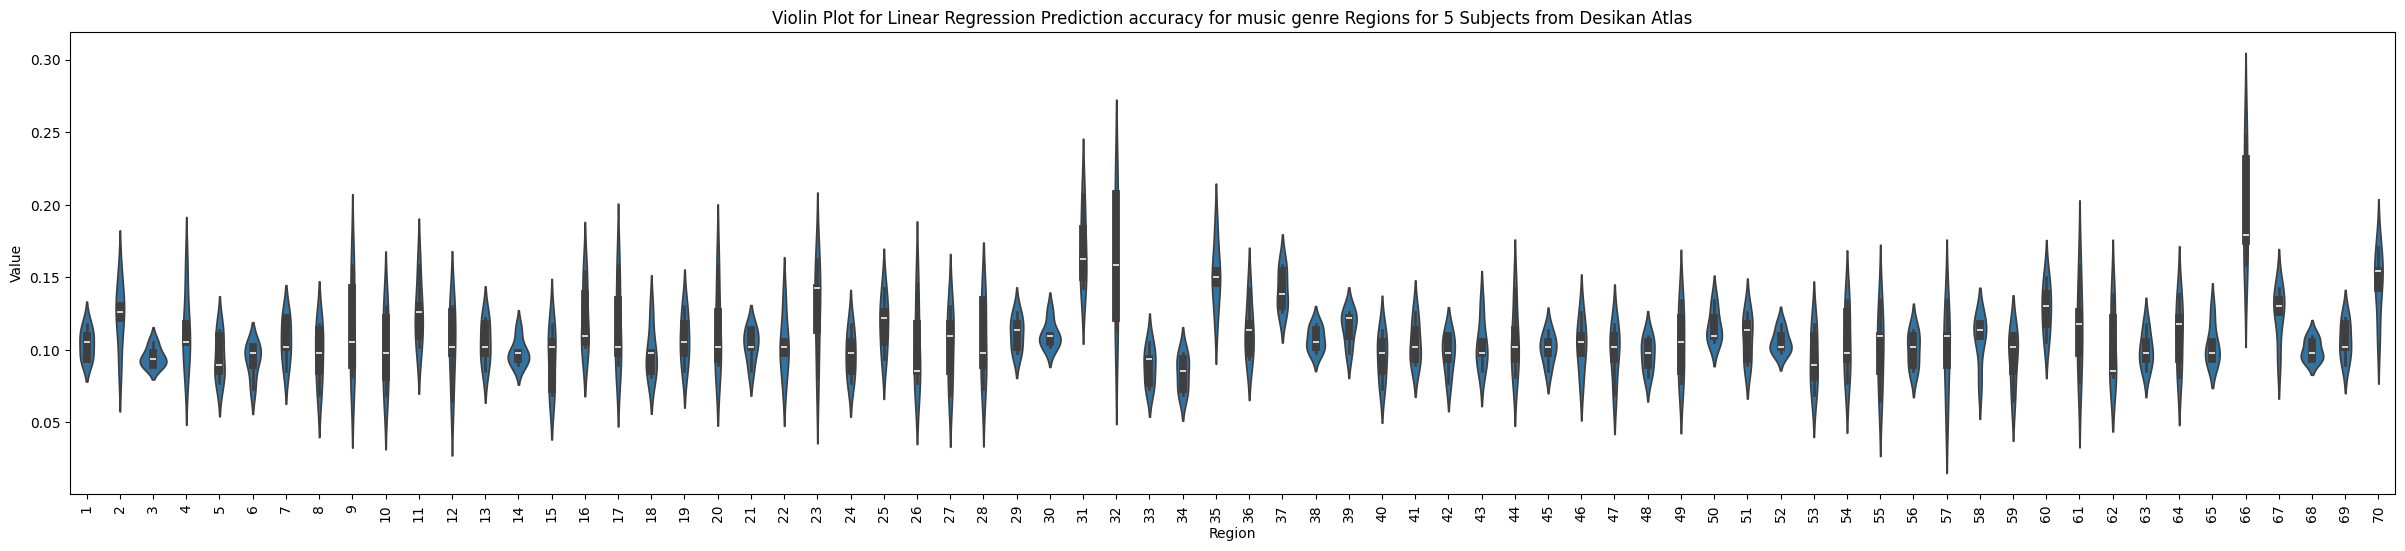

In [ ]:
# prompt: Can you plot 70 side by side violin plots that traverse the 5 datapoint in each all_collected_data key value paris

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'all_collected_data' is already defined and populated as in your previous code

# Prepare data for plotting
plot_data = []
for key in all_collected_data:
    for i in range(5):
      plot_data.append({'Region': int(key), 'Value': float(all_collected_data[key][i])})

df_plot = pd.DataFrame(plot_data)


# Create the violin plot
plt.figure(figsize=(30, 6))  # Adjust figure size as needed
sns.violinplot(x='Region', y='Value', data=df_plot)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Region')
plt.ylabel('Value')
plt.title('Violin Plot for Linear Regression Prediction accuracy for music genre Regions for 5 Subjects from Desikan Atlas')
plt.show()


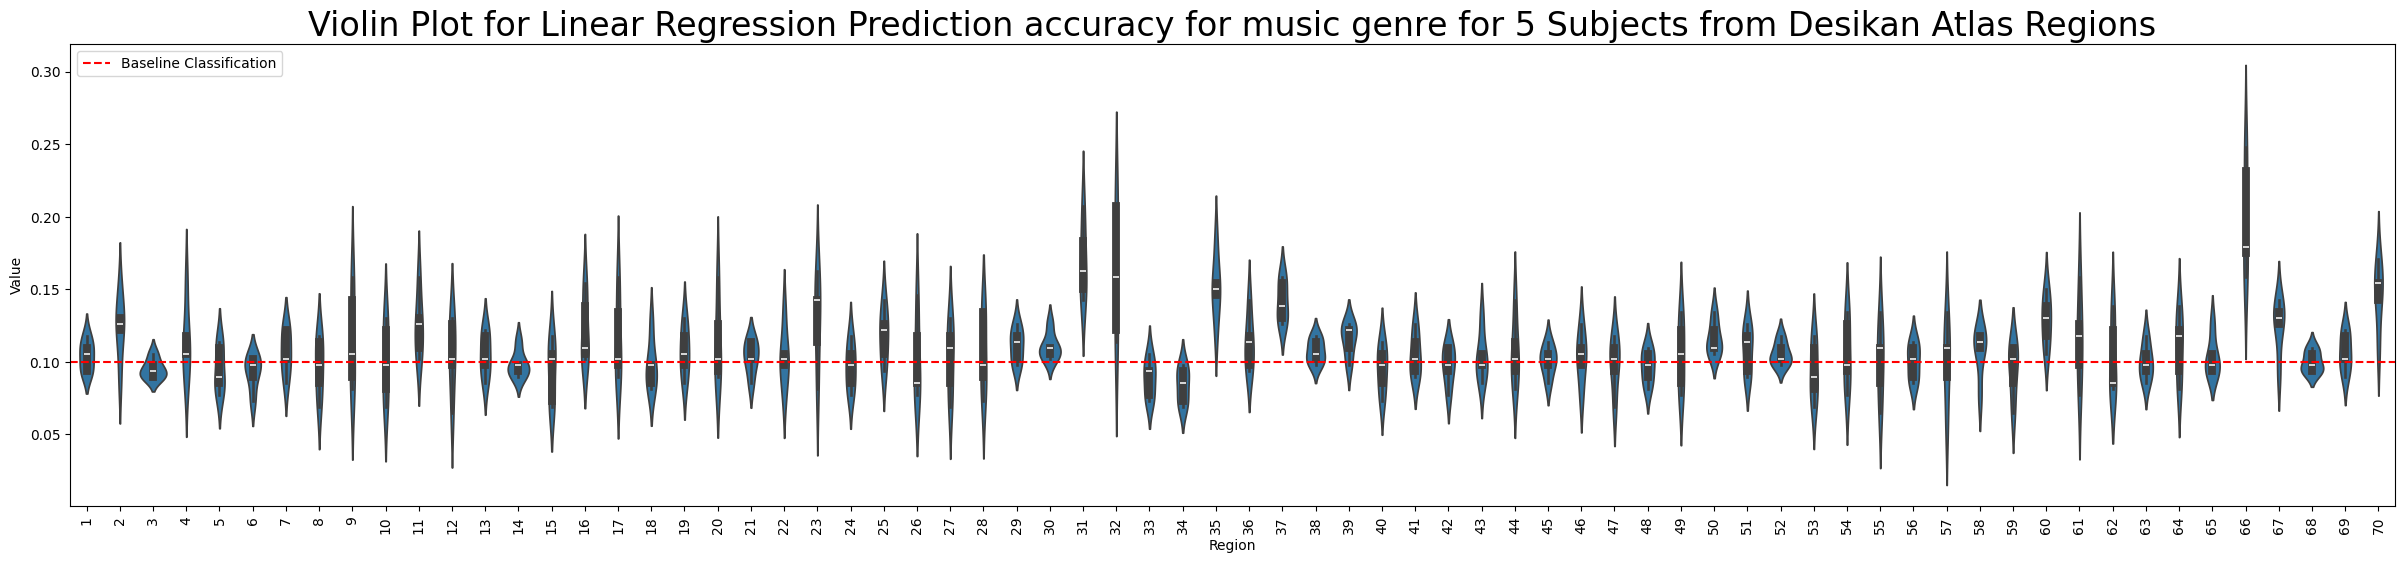

In [19]:
# prompt: Can you add a horizontal baseline at 0.1

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming 'all_collected_data' is already defined and populated as in your previous code

# Prepare data for plotting
plot_data = []
for key in all_collected_data:
    for i in range(5):
      plot_data.append({'Region': int(key), 'Value': float(all_collected_data[key][i])})

df_plot = pd.DataFrame(plot_data)


# Create the violin plot
plt.figure(figsize=(30, 6))  # Adjust figure size as needed
sns.violinplot(x='Region', y='Value', data=df_plot)
plt.axhline(y=0.1, color='r', linestyle='--', label='Baseline Classification') # Add horizontal line
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Region')
plt.ylabel('Value')
plt.title('Violin Plot for Linear Regression Prediction accuracy for music genre for 5 Subjects from Desikan Atlas Regions', fontsize=24)
plt.legend() # Show the legend
plt.show()
